In [1]:
#kindly note the code was done of of my local Jupyter notbook instance  and as such I was unable to share the link. I have however attached the notebook itself with all code and instructions

# Show all Jupyter cell outputs, NOT just the last cell's output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


import pandas as pd
import requests, json 
from bs4 import BeautifulSoup as soup

In [2]:
data = pd.read_excel('ZNBC_X.xlsx')

In [3]:
#inspect the dataframe
data.columns
data.sample(3)

Index(['Title', 'Class'], dtype='object')

,Title,Class
3173,SHEPOLOPOLO TOKYO BOUND,Default
1941,ZESCO CUTS LOADSHEDDING,Default
529,MINES TO BE AUDITED ON ENVIRONMENTAL FUND,Politics


In [4]:
# Show all Jupyter cell outputs, NOT just the last cell's output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import re
import string
from random import randint

from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from collections import Counter

from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, recall_score, precision_score,f1_score

In [5]:
posts = pd.read_excel('ZNBC_X.xlsx')

In [6]:
posts['Xs'] =  posts.Title #create new column 'Xs'
posts['Y'] = LabelEncoder().fit(posts.Class.unique()).transform(posts.Class) #label encode

posts = posts[['Xs','Y','Class']] # Drop 'title' and 'views'

In [7]:
#inspect the dataframe
posts.columns
posts.sample(5)

Index(['Xs', 'Y', 'Class'], dtype='object')

,Xs,Y,Class
832,HH's TWO MONTHS IN OFFICE,4,Politics
2870,FIFA TASKS FAZ TO RESOLVE WRANGLES,0,Default
2968,NEW MAIZE PRICE NODDED,0,Default
2400,ECZ ANNOUNCES 2021 GENERAL ELECTION ROADMAP,0,Default
2940,"COVID-19: ZAMBIAN COLLEGES OPEN JUNE 29, 2020",4,Politics


In [8]:
post_content = posts.Xs
print('There are a total of {} posts'.format(len(post_content)))

index = randint(0,20)  #only inspect posts from the first 20 in the list
post_content[index]
len(post_content)

There are a total of 3232 posts


'SIKOTA WINA DIES'

3232

Class
Default      1977
Education      93
Health         96
Local         320
Politics      712
Sports         31
Name: Class, dtype: int64

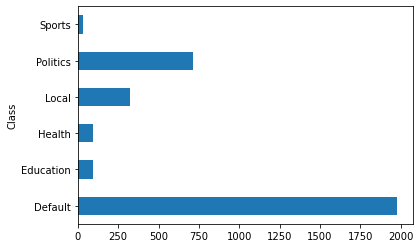

In [9]:
#inspecting the distribution of comments
posts.groupby('Class').Class.count()
posts.groupby('Class').Class.count().plot.barh()

In [10]:
# 2. Case Folding
# Good idea to implement a function here [...]

def func_post_case_folding(contentText):
    return convertToString(contentText)
    
    
def convertToString(term):
  if type(term) is str:
    return term
  else:
    return str(term)

# 3. Punctuation
# Function for removing punctuations from string of text
def func_post_punctuation(contentText):
    
    #replace special charactors with ' '
    contentText_out = re.sub('[^\w\s]', ' ',contentText)
    contentText_out = re.sub('_', '',contentText_out)
    
    #change any whitespace to one space
    contentText_out = re.sub('\s+', ' ',contentText_out)
    
    #remove start and end whitespaces
    contentText_out = contentText_out.strip()
    
    contentText_out = re.sub('\w*\d\w*', '', contentText_out) # replace digits
    return contentText_out

# 4. Stopwords
# Function for removing stopwords from string of text
def func_post_stopwords(contentText_in):
    
    contentText_out = " ".join([
        contentText_word for contentText_word in contentText_in.split() 
        if contentText_word not in stopwords.words('english')
    ])
    return contentText_out

# 5. Stemming
# Function for removing stopwords from string of text
# Remember: input will be chunck of text
def func_post_stem(contentText):
    var_stemmer = PorterStemmer()
    contentText_out = " ".join([
        var_stemmer.stem(contentText_word) for contentText_word in contentText.split() 
    ])
    return contentText_out

# 6. form the corpus

def func_get_all_words(content_list):
    all_words = []
    for item in content_list:
        var_word = convertToString(item)
        for n in var_word.split():
            all_words.append(n)
    return all_words
        

# 7. Term Frequency 

def func_tf_transform(all_words_list,clean_content_list):
    var_transformed_dataset = []
    for item in clean_content_list:
        #print (var_etd_entry)
        var_dataset = []
        var_tokens = item.split()
        for x in all_words_list:
            #print (var_dictionary_entry)
            var_dataset.append(var_tokens.count(x[0]))
        var_transformed_dataset.append(var_dataset)
    return var_transformed_dataset


# function for functions to carry out step 2 to 5
# Function for removing stopwords from string of text

def func_clean_posts(content_list):
    
    temp_list = []
    for item in content_list:
        itemOut = func_post_case_folding(item)
        itemOut = func_post_punctuation(itemOut)
        itemOut = func_post_stopwords(itemOut)
        itemOut = func_post_stem(itemOut)
        
        temp_list.append(itemOut)
        
    return temp_list

In [11]:
post_content.dropna(inplace= True)
post_content_list = list(post_content)

In [12]:
#clean the content list
clean_post_content_list = func_clean_posts(post_content_list)

In [84]:
clean_post_content_list[index]

'SIKOTA WINA DIES'

In [14]:
len(post_content)
len(clean_post_content_list)

3229

3229

In [35]:
cleanPosts = posts
cleanPosts.Xs = posts.Xs
cleanPosts.to_excel('cleanPosts.xlsx')

In [52]:
cleanPosts = pd.read_excel('cleanPosts.xlsx')
clean_post_content_list = list(cleanPosts.Xs)

In [80]:
cleanPosts.sample(5)

,Unnamed: 0,Xs,Y,Class
2660,2660,CHONGWE WOMEN APPEAL FOR LAND,0,Default
1637,1637,TRANSPORTERS ON VACCINE,0,Default
1421,1421,PRESIDENT LUNGU WISHES KK WELL,4,Politics
1009,1009,UTH IN CUSTODY OF UNIDENTIFIED TWO PATIENT,2,Health
1250,1250,SP HEADMEN BACK LUNGU,4,Politics


In [72]:
Counter(func_get_all_words(clean_post_content_list)).most_common(10)

[('TO', 449),
 ('IN', 243),
 ('FOR', 237),
 ('ECL', 181),
 ('ON', 171),
 ('OF', 164),
 ('GOVT', 163),
 ('COVID-19:', 147),
 ('ZAMBIA', 135),
 ('COVID', 132)]

In [55]:
Label_class_df = cleanPosts[['Class', 'Y']].drop_duplicates().sort_values('Y').reset_index().drop(columns='index')
Label_class_df

,Class,Y
0,Default,0
1,Education,1
2,Health,2
3,Local,3
4,Politics,4
5,Sports,5


In [56]:
vectorizer = CountVectorizer()
vectorizer = TfidfVectorizer()
vectorizer.fit(post_content_list)

TfidfVectorizer()

In [57]:
features = vectorizer.transform(post_content_list)
features_columns = vectorizer.get_feature_names_out()

In [58]:
features_df = pd.DataFrame(features.toarray(), columns = features_columns)
features_df.shape

(3229, 4311)

In [59]:
x_train, x_test, y_train, y_test = train_test_split(features_df , cleanPosts['Y'], test_size=0.20)
len(x_train)
len(x_test)

2583

646

In [89]:
# Performing CV to tune parameters for best SVM fit
model = LinearSVC()
# model = LogisticRegression(multi_class= 'auto')
model.fit(x_train, y_train)

LinearSVC()

In [90]:
model.score(x_test, y_test)
y_pred = model.predict(x_test)

0.9613003095975232

Text(33.0, 0.5, 'Actual')

Text(0.5, 15.0, 'Predicted')

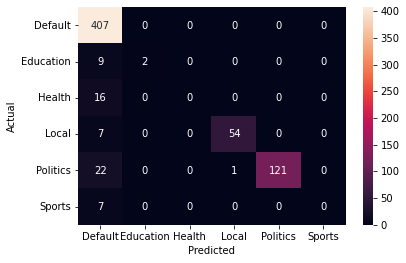

In [83]:
# creating the confusion matrix

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=Label_class_df.Class.values, yticklabels=Label_class_df.Class.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [63]:
print(classification_report(y_test, y_pred,target_names= Label_class_df.Class.values ))

              precision    recall  f1-score   support

     Default       0.95      1.00      0.97       407
   Education       0.88      0.64      0.74        11
      Health       1.00      0.75      0.86        16
       Local       0.98      0.98      0.98        61
    Politics       1.00      0.92      0.96       144
      Sports       1.00      0.43      0.60         7

    accuracy                           0.96       646
   macro avg       0.97      0.79      0.85       646
weighted avg       0.96      0.96      0.96       646



In [64]:
scores = cross_val_score(model,features_df, cleanPosts['Y'], cv=10, scoring='accuracy')
print(scores)

[0.93498452 0.94427245 0.99380805 0.95356037 0.94736842 0.94117647
 0.97832817 0.9628483  0.9504644  0.9689441 ]


In [65]:
print('The Cross-validation score is {}'.format(scores.mean()))

The Cross-validation score is 0.9575755244889719
